# Testing a trained model on a real image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

In [2]:
dim_x = 216

## Preparing the image

In [3]:
original_image = mpimg.imread('E:\Git\Portfolio\PlotRecognition\OmegaLambda.JPG')

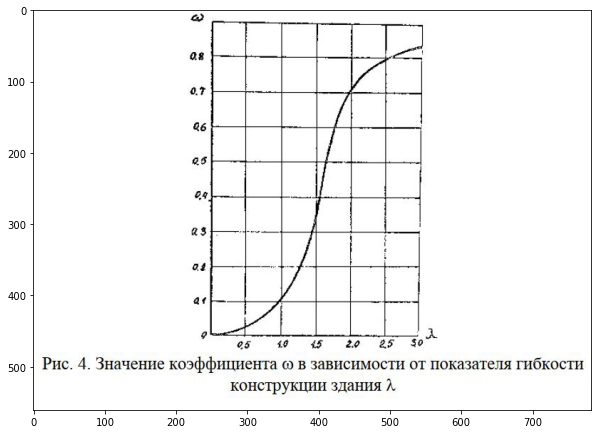

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(original_image, cmap='gray')

I tried two options: passing a grayscale image to my model (although it was trained on truly black-and-white images) and truly black-and-white 1-bit image.

By truly black-and-white I mean no shades of gray, only black (1) or white (0).

### Grayscale image

The image was prepared manually (using the GIMP photo editor): rotated, cropped, shrunk to the required size (216 by 216 pixels) and converted to grayscale.

In [5]:
image = mpimg.imread('E:\Git\Portfolio\PlotRecognition\OmegaLambda_prepared.jpg')

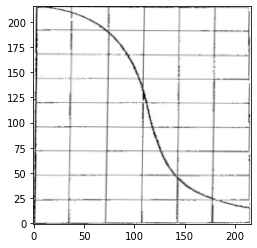

In [6]:
plt.imshow(image, cmap='gray', origin='lower')

The image is seen upside down, so I flip it and convert into the format the model will understand.

In [7]:
plot_grayscale = np.flipud(((255 - image) / 255))

In [8]:
plot_grayscale = np.expand_dims(plot_grayscale, 0)

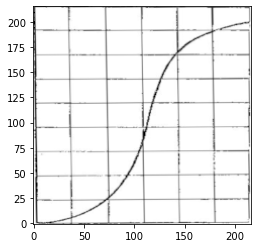

In [9]:
plt.imshow(plot_grayscale[0, :, :], cmap='gray_r', vmin=0, vmax=1, origin='lower')

### Black-and-white 1-bit image

The image was prepared the same way as before but also converted to a 1-bit mode, which is truly black-and-white, in the same photo editor.

In [10]:
image_1bit = mpimg.imread('E:\Git\Portfolio\PlotRecognition\OmegaLambda_1bit.jpg')

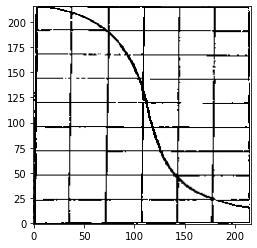

In [11]:
plt.imshow(image_1bit, cmap='gray', origin='lower')

The image is seen upside down, so I flip it and convert into the format the model will understand.

In [12]:
plot_bw = np.flipud(((255 - image) / 255))

In [13]:
plot_bw = np.expand_dims(plot_bw, 0)

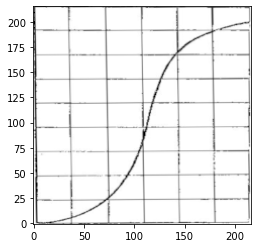

In [14]:
plt.imshow(plot_bw[0, :, :], cmap='gray_r', vmin=0, vmax=1, origin='lower')

## Prediction

In [15]:
model = tf.keras.models.load_model('E:\Git\Portfolio\PlotRecognition\model')

In [16]:
def plot_result(plot_number, x, y):
    plt.imshow(x[plot_number, :, :], cmap='gray_r', vmin=0, vmax=1, origin='lower')
    plt.plot(list(range(0, dim_x)), y[plot_number, :], color='red')
    plt.show()

### Grayscale image

In [17]:
prediction_grayscale = model.predict(plot_grayscale)

1/1 [==============================] - 0s 181ms/step


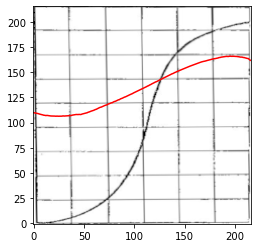

In [18]:
plot_result(0, plot_grayscale, prediction_grayscale)

### Black-and-white image

In [19]:
prediction_bw = model.predict(plot_bw)

1/1 [==============================] - 0s 54ms/step


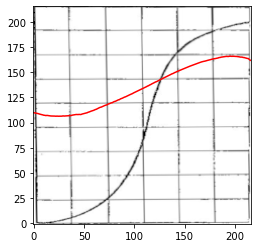

In [20]:
plot_result(0, plot_bw, prediction_bw)

## Other images

In [21]:
plots = np.load('E:\Git\Portfolio\PlotRecognition\plots_test.npy')

In [24]:
plots.shape

(2000, 216, 216)

In [25]:
prediction = model.predict(plots[0:10, :, :])

1/1 [==============================] - 0s 277ms/step


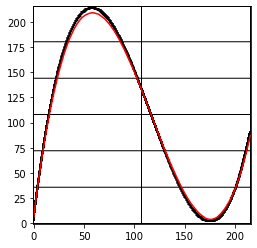

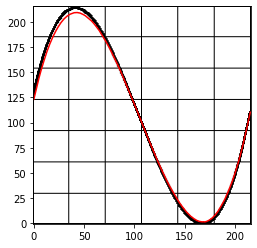

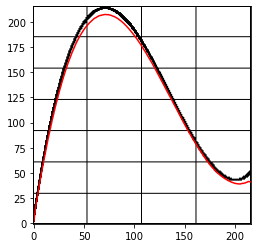

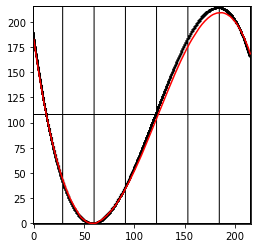

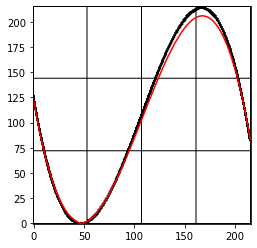

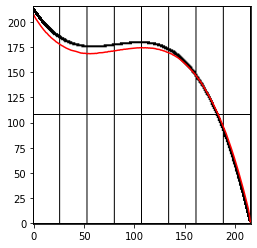

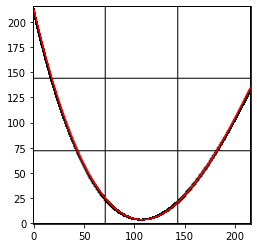

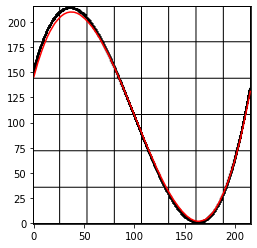

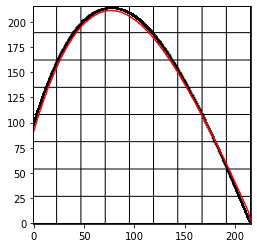

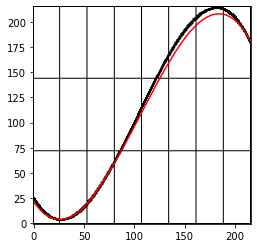

In [31]:
for i in range(10):
    plot_result(i, plots, prediction)

# So the model works well on this particular data set but not on the real image, probably because the curve and grid lines in the dataset have different thicknesses but not on the real image, which also has lower quality.
More testing is necessary.